In [4]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
##%%capture                
##! pip install seaborn    
import seaborn as sns
%matplotlib inline    
!pip install Folium
import folium
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

In [5]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ed2637dd630949c89e9ef2e2a64cc11e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='qkko9genTEYXGQWzZ20OMC5oN-VNBxEBa5RVdg3_oNLC',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_ed2637dd630949c89e9ef2e2a64cc11e.get_object(Bucket='edx1-donotdelete-pr-dn5npthdappic9',Key='NYCdata.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# NYC complaint dataset
df_311 = pd.read_csv(body)
df_311.head()


,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2020-02-11T16:30:41.000,45597712,HEAT/HOT WATER,10473.0,875 MORRISON AVENUE,MORRISON AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.821609,-73.872835,NaN,RESIDENTIAL BUILDING,Open
1,2020-02-11T13:03:51.000,45595774,HEAT/HOT WATER,11236.0,1109 EAST 105 STREET,EAST 105 STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.644055,-73.890798,NaN,RESIDENTIAL BUILDING,Open
2,2020-02-11T05:14:53.000,45597773,HEAT/HOT WATER,10033.0,129 WADSWORTH AVENUE,WADSWORTH AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.848828,-73.935690,NaN,RESIDENTIAL BUILDING,Open
3,2020-02-11T15:51:07.000,45597745,HEAT/HOT WATER,10033.0,1401 ST NICHOLAS AVENUE,ST NICHOLAS AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.848783,-73.934140,NaN,RESIDENTIAL BUILDING,Open
4,2020-02-11T10:14:47.000,45596755,HEAT/HOT WATER,11237.0,296 STANHOPE STREET,STANHOPE STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.702471,-73.918679,NaN,RESIDENTIAL BUILDING,Open


In [6]:

body = client_ed2637dd630949c89e9ef2e2a64cc11e.get_object(Bucket='edx1-donotdelete-pr-dn5npthdappic9',Key='BK_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_BK  = pd.read_csv(body)
df_BK .head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,24,25,26,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BK,1,1,302,21.0,NaN,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,3.000010e+09,11/26/2013,1,1.0,1.0,18V1
1,BK,1,50,302,21.0,2000.0,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,E-231,0.000000e+00,NaN,1,1.0,1.0,18V1
2,BK,1,7501,302,21.0,2000.0,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,3.000010e+09,03/04/2016,1,1.0,1.0,18V1
3,BK,3,1,302,21.0,3002.0,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,0.000000e+00,NaN,1,1.0,1.0,18V1
4,BK,3,5,302,21.0,NaN,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,0.000000e+00,NaN,4,1.0,1.0,18V1


In [7]:

body = client_ed2637dd630949c89e9ef2e2a64cc11e.get_object(Bucket='edx1-donotdelete-pr-dn5npthdappic9',Key='BX_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_BX = pd.read_csv(body)
df_BX.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BX,2260,1,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
1,BX,2260,4,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
2,BX,2260,10,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
3,BX,2260,17,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
4,BX,2260,18,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1


In [8]:

body = client_ed2637dd630949c89e9ef2e2a64cc11e.get_object(Bucket='edx1-donotdelete-pr-dn5npthdappic9',Key='MN_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_MN  = pd.read_csv(body)
df_MN .head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (20,23,24,26,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_Flag,PFIRM15_Flag,Version
0,MN,1,10,101,5.0,1011.0,2.0,1.0,10004.0,E007,...,Y,199 999,10101.0,NaN,0.0,NaN,1,1.0,1.0,18V1
1,MN,1,101,101,1.0,1001.0,2.0,1.0,10004.0,E007,...,Y,199 999,10101.0,NaN,0.0,NaN,1,NaN,1.0,18V1
2,MN,1,201,101,1.0,1000.0,2.0,1.0,10004.0,E007,...,NaN,199 999,10101.0,NaN,0.0,NaN,1,NaN,1.0,18V1
3,MN,1,301,101,NaN,NaN,2.0,1.0,10004.0,E007,...,NaN,199 999,10101.0,NaN,0.0,NaN,4,1.0,1.0,18V1
4,MN,1,401,101,NaN,NaN,2.0,1.0,10004.0,E007,...,NaN,1 99 999,10101.0,NaN,0.0,NaN,4,1.0,1.0,18V1


In [9]:

body = client_ed2637dd630949c89e9ef2e2a64cc11e.get_object(Bucket='edx1-donotdelete-pr-dn5npthdappic9',Key='QN_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_QN = pd.read_csv(body)
df_QN.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,64,65,77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,QN,6,1,402,1.0,NaN,30.0,26.0,11101.0,L115,...,Y,401 011,40101.0,NaN,4.000060e+09,09/20/2013,1,1.0,1.0,18V1
1,QN,6,3,402,1.0,1015.0,30.0,26.0,11101.0,L115,...,NaN,401 011,40101.0,NaN,0.000000e+00,NaN,1,1.0,1.0,18V1
2,QN,6,8,402,1.0,1011.0,30.0,26.0,11101.0,L115,...,NaN,401 011,40101.0,NaN,4.000060e+09,08/07/2013,1,1.0,1.0,18V1
3,QN,6,20,402,1.0,NaN,30.0,26.0,11101.0,L115,...,NaN,401 011,40101.0,NaN,4.000060e+09,09/20/2013,1,1.0,1.0,18V1
4,QN,6,30,402,1.0,NaN,30.0,26.0,11101.0,L115,...,NaN,401 011,40101.0,NaN,4.000060e+09,09/08/2017,1,1.0,1.0,18V1


In [10]:

body = client_ed2637dd630949c89e9ef2e2a64cc11e.get_object(Bucket='edx1-donotdelete-pr-dn5npthdappic9',Key='SI_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_SI = pd.read_csv(body)
df_SI.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,24,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,SI,1,10,501,3.0,2000.0,31.0,49.0,10301.0,L078,...,NaN,501 017,50101.0,NaN,0.0,NaN,1,NaN,NaN,18V1
1,SI,1,17,501,3.0,NaN,31.0,49.0,10301.0,L078,...,NaN,501 017,50101.0,NaN,0.0,NaN,1,NaN,NaN,18V1
2,SI,1,18,501,3.0,NaN,31.0,49.0,10301.0,L078,...,NaN,501 017,50101.0,NaN,0.0,NaN,1,NaN,NaN,18V1
3,SI,1,19,501,3.0,NaN,31.0,49.0,10301.0,L078,...,NaN,501 017,50101.0,NaN,0.0,NaN,1,NaN,NaN,18V1
4,SI,1,21,501,3.0,NaN,31.0,49.0,10301.0,L078,...,NaN,501 017,50101.0,NaN,0.0,NaN,1,NaN,NaN,18V1


In [11]:
# Selecting column with maximum compaints incdent zip (BK: Brooklyn) given in PLUTO dataset 
# I am excluding Staten Isaland borough as it has very low number of complaints

df_data_BK_1 = df_BK[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 
'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 
'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']]

df_data_BK_1 = df_data_BK_1.dropna()

# Selecting column with maximum compaints incdent zip (BX) given in PLUTO dataset 


df_data_BX_1 = df_BX[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 
'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 
'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']]

df_data_BX_1 = df_data_BX_1.dropna()

# Selecting column with maximum compaints incdent zip (MN) given in PLUTO dataset 


df_data_MN_1 = df_MN[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 
'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 
'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']]

df_data_MN_1 = df_data_MN_1.dropna()

# Selecting column with maximum compaints incdent zip (QN) given in PLUTO dataset 


df_data_QN_1 = df_QN[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 
'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 
'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']]

df_data_QN_1 = df_data_QN_1.dropna()

# Selecting column with maximum compaints incdent zip (SI) given in PLUTO dataset

df_data_SI_1 = df_SI[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 
'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 
'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']]

df_data_SI_1 = df_data_SI_1.dropna()

In [12]:
frames = [df_data_BK_1, df_data_BX_1, df_data_MN_1, df_data_QN_1,df_data_SI_1]

df_pluto = pd.concat(frames)

df_pluto.index = range(len(df_pluto.index))

df_pluto.shape

(835242, 20)

In [13]:
print(df_311.columns)
print(df_pluto.columns)

Index(['created_date', 'unique_key', 'complaint_type', 'incident_zip',
       'incident_address', 'street_name', 'address_type', 'city',
       'resolution_description', 'borough', 'latitude', 'longitude',
       'closed_date', 'location_type', 'status'],
      dtype='object')
Index(['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR',
       'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea',
       'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1',
       'ZipCode', 'YCoord', 'XCoord'],
      dtype='object')


In [14]:
# merging HEATING and HEAT/HOT WATER as one feature
df_311['complaint_type'] = np.where(df_311['complaint_type']=='HEATING','HEAT/HOT WATER',df_311['complaint_type'])
df_complaint = df_311.loc[df_311['complaint_type']=='HEAT/HOT WATER'].dropna()
df_complaint.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
6,2020-02-11T11:46:25.000,45596780,HEAT/HOT WATER,10468.0,10 EAST 198 STREET,EAST 198 STREET,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.871248,-73.892833,2020-02-11T19:19:55.000,RESIDENTIAL BUILDING,Closed
9,2020-02-11T16:42:10.000,45595806,HEAT/HOT WATER,10002.0,45 HENRY STREET,HENRY STREET,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.712943,-73.995480,2020-02-11T21:14:44.000,RESIDENTIAL BUILDING,Closed
46,2020-02-11T16:07:25.000,45597737,HEAT/HOT WATER,11385.0,66-67 FRESH POND ROAD,FRESH POND ROAD,ADDRESS,Ridgewood,The Department of Housing Preservation and Dev...,QUEENS,40.706851,-73.897101,2020-02-11T20:31:20.000,RESIDENTIAL BUILDING,Closed
69,2020-02-11T03:00:37.000,45597706,HEAT/HOT WATER,10017.0,341 EAST 42 STREET,EAST 42 STREET,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.749280,-73.970885,2020-02-11T21:20:36.000,RESIDENTIAL BUILDING,Closed
81,2020-02-11T17:19:33.000,45597698,HEAT/HOT WATER,10458.0,2664 GRAND CONCOURSE,GRAND CONCOURSE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.866405,-73.894114,2020-02-11T19:19:55.000,RESIDENTIAL BUILDING,Closed


In [15]:
df_target = df_pluto[['Address']].isin(df_complaint['incident_address'].unique())
print(df_target['Address'].sum())
df_target = (df_target['Address'])*1
df_target.dtypes

106941


dtype('int64')

In [16]:
df_pluto.loc[:,'target'] = df_target
df_pluto.head()

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,...,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,target
0,10 JAY STREET,163894,195.0,8.33,2.0,6.5,50,19682,207.25,1,...,147505,0,5.4,16389,1920,1994,11201.0,195989.0,987838.0,0
1,1 JOHN STREET,102534,0.0,0.00,2.0,0.0,7501,0,0.00,1,...,0,97848,0.0,4686,0,0,11201.0,195992.0,987624.0,0
2,JAY STREET,0,0.0,0.00,2.0,0.0,1,387060,469.00,15,...,0,0,0.0,0,0,0,11201.0,196151.0,988568.0,0
3,135 MARSHALL STREET,0,0.0,0.00,2.0,0.0,1,0,346.00,4,...,0,0,0.0,0,0,0,11201.0,196266.0,989346.0,0
4,1 HUDSON AVENUE,0,0.0,0.00,2.0,0.0,1,323307,657.00,15,...,0,0,0.0,0,0,0,11201.0,196040.0,989745.0,0


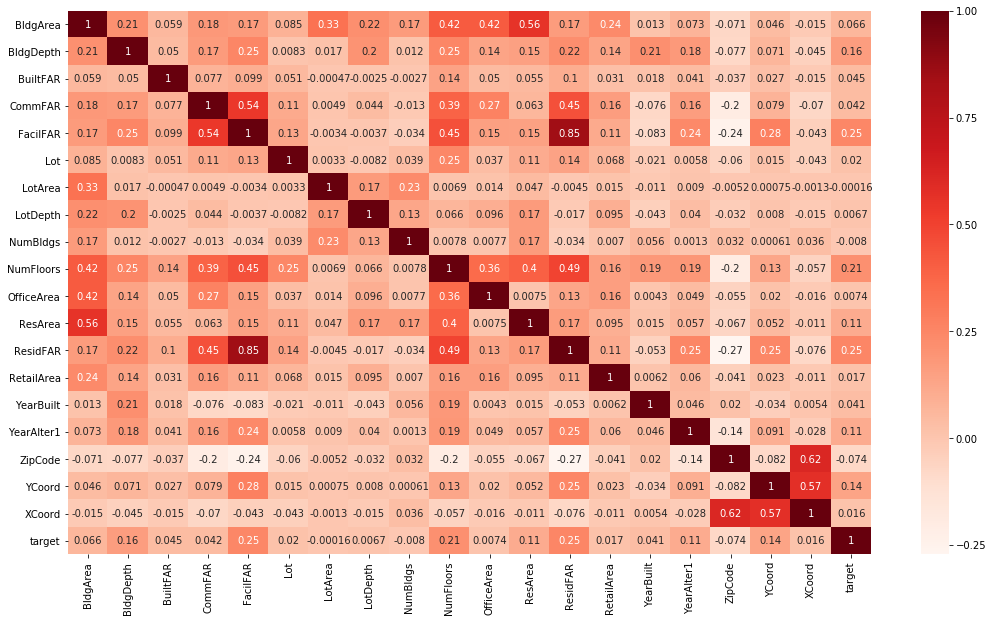

In [17]:
# using Pearson correlation
plt.figure(figsize=(18,10))
cor = df_pluto.corr()
sns.heatmap(cor, annot = True, cmap=plt.cm.Reds)
plt.show()

In [18]:
#Correlation with output variable
cor_target = abs(cor["target"])
#Selecting highly correlated features. Here I set the threshold to be 0.12
relevant_features = cor_target[cor_target>0.12]
relevant_features

BldgDepth    0.160296
FacilFAR     0.245962
NumFloors    0.212177
ResidFAR     0.254328
YCoord       0.136248
target       1.000000
Name: target, dtype: float64

In [19]:
print(df_pluto[["ResidFAR","FacilFAR"]].corr())

          ResidFAR  FacilFAR
ResidFAR  1.000000  0.847594
FacilFAR  0.847594  1.000000


In [20]:
important_feature = ['BldgDepth', 'NumFloors', 'ResidFAR', 'ZipCode','target']
df_selected_feature = df_pluto[important_feature]
df_selected_feature.head()

,BldgDepth,NumFloors,ResidFAR,ZipCode,target
0,195.0,10.0,5.4,11201.0,0
1,0.0,12.0,0.0,11201.0,0
2,0.0,0.0,0.0,11201.0,0
3,0.0,0.0,0.0,11201.0,0
4,0.0,0.0,0.0,11201.0,0


In [21]:
# data for features set and target

X = df_pluto.drop(["Address", "target", "XCoord", "YCoord"],1)
y = df_pluto["target"]

# feature labels
feat_labels = list(X.columns)

# Split the data into 30% test and 70% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
# feature scaling

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.fit_transform(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [23]:
# Create a random forest classifier
clf = RandomForestClassifier(random_state=0, n_jobs=2)

# Train the classifier
clf.fit(X_train, y_train)

importances = clf.feature_importances_

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


('BldgArea', 0.08429469180339584)
('BldgDepth', 0.07859914754664318)
('BuiltFAR', 0.11876467469779095)
('CommFAR', 0.006927647962396632)
('FacilFAR', 0.025643295151588412)
('Lot', 0.1713618825754577)
('LotArea', 0.07429992925395082)
('LotDepth', 0.051837389895716554)
('NumBldgs', 0.013152209757564098)
('NumFloors', 0.03908439799862993)
('OfficeArea', 0.006242460341302461)
('ResArea', 0.133823287792584)
('ResidFAR', 0.03230328858040508)
('RetailArea', 0.015197338622129472)
('YearBuilt', 0.061107275250272666)
('YearAlter1', 0.01923825419826652)
('ZipCode', 0.06812282857190564)


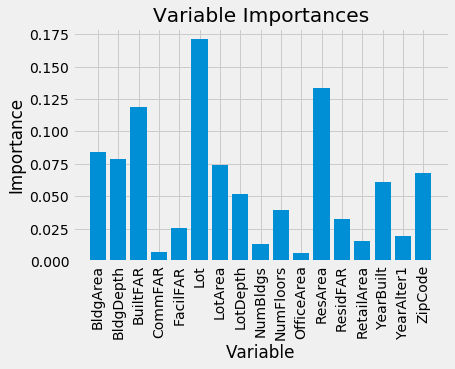

In [24]:
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feat_labels, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [25]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.04
sfm = SelectFromModel(clf, threshold=0.04)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.04)

In [26]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

BldgArea
BldgDepth
BuiltFAR
Lot
LotArea
LotDepth
ResArea
YearBuilt
ZipCode


In [27]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [28]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(random_state=0, n_jobs=2)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [29]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature (19 Features) Model
accuracy_allFeatures = accuracy_score(y_test, y_pred)

In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

rmse_allFeatures = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 0.1234131370897902
Mean Squared Error: 0.1234131370897902
Root Mean Squared Error: 0.35130205961507


In [31]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (10 Features) Model
accuracy_importantFeatures = accuracy_score(y_test, y_important_pred)

In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_important_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_important_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_important_pred)))  

rmse_importantFeatures = np.sqrt(metrics.mean_squared_error(y_test, y_important_pred))

Mean Absolute Error: 0.1347910588930172
Mean Squared Error: 0.1347910588930172
Root Mean Squared Error: 0.3671390184834856


In [33]:


print('accuracy_allFeatures:', accuracy_allFeatures)
print('rmse_allFeatures:', rmse_allFeatures)
print('accuracy_importantFeatures:', accuracy_importantFeatures)
print('rmse_importantFeatures:', rmse_importantFeatures)



accuracy_allFeatures: 0.8765868629102098
rmse_allFeatures: 0.35130205961507
accuracy_importantFeatures: 0.8652089411069828
rmse_importantFeatures: 0.3671390184834856


<font color=red> Concluding Remark:
<font color=red> Using Pearson correlation techniques predicts that 'BldgDepth', 'ResiFAR', 'NumFloors', 'ZipCode' are the important features. Furthermore, Random Forest method gives'BldgArea', 'BldgDepth', 'BuiltFAR', 'Lot', 'LotArea', 'ResArea', 'YearBuilt', 'ZipCode' as an important features. The accuracy score shows that using these important features have 87% accuracy. By using these two methods we are confident that out model is good enough to use for prediction for out of sample data and detect the correct housing characterstics that are highly correlated to complaint type.